In [153]:
library("tidyverse")
library("tidymodels")

Warning message:
“package ‘tidymodels’ was built under R version 3.6.2”── Attaching packages ────────────────────────────────────── tidymodels 0.1.0 ──
✔ broom     0.5.5      ✔ rsample   0.0.5 
✔ dials     0.0.4      ✔ tune      0.0.1 
✔ infer     0.5.1      ✔ workflows 0.1.1 
✔ parsnip   0.0.5      ✔ yardstick 0.0.6 
✔ recipes   0.1.10     
Warning message:
“package ‘broom’ was built under R version 3.6.2”Warning message:
“package ‘parsnip’ was built under R version 3.6.2”Warning message:
“package ‘recipes’ was built under R version 3.6.2”Warning message:
“package ‘tune’ was built under R version 3.6.2”Warning message:
“package ‘workflows’ was built under R version 3.6.2”Warning message:
“package ‘yardstick’ was built under R version 3.6.2”── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖

In [15]:
ivf_raw = data.table::fread("data/hfea-ivf.csv")
ivf_raw %>% glimpse(width = 120)

Observations: 1,376,454
Variables: 96
$ `Patient Age at Treatment`                                                 <chr> "18 - 34", "35-37", "18 - 34", "38…
$ `Date patient started trying to become pregnant OR date of last pregnancy` <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ `Total Number of Previous cycles, Both IVF and DI`                         <chr> "1", "0", "0", "1", "0", "1", "0",…
$ `Total Number of Previous treatments, Both IVF and DI at clinic`           <chr> "1", "0", "0", "1", "0", "1", "0",…
$ `Total Number of Previous IVF cycles`                                      <chr> "0", "0", "0", "0", "0", "0", "0",…
$ `Total Number of Previous DI cycles`                                       <chr> "1", "0", "0", "1", "0", "1", "0",…
$ `Total number of previous pregnancies, Both IVF and DI`                    <chr> "0", "0", "0", "0", "0", "0", "0",…
$ `Total number of IVF pregnancies`                                          <chr> "0", "0", "0", "0", "0", "0", "0",…
$ `Total n

In [16]:
ivf_raw %>% names() %>% sort()

[1] "Cause  of Infertility - Tubal disease"                                   
 [2] "Cause of Infertility -  Partner Sperm Immunological factors"             
 [3] "Cause of Infertility -  Partner Sperm Morphology"                        
 [4] "Cause of Infertility - Cervical factors"                                 
 [5] "Cause of Infertility - Endometriosis"                                    
 [6] "Cause of Infertility - Female Factors"                                   
 [7] "Cause of Infertility - Male Factor"                                      
 [8] "Cause of Infertility - Ovulatory Disorder"                               
 [9] "Cause of Infertility - Partner Sperm Concentration"                      
[10] "Cause of Infertility - Patient Unexplained"                              
[11] "Causes of Infertility - Partner Sperm Motility"                          
[12] "Date of Egg Collection"                                                  
[13] "Date of Egg Mixing"                                                      
[14] "Date of Egg Thawing"                                                     
[15] "Date of Embryo Thawing"                                                  
[16] "Date of Embryo Transfer"                                                 
[17] "Date patient started trying to become pregnant OR date of last pregnancy"
[18] "Donated embryo"                                                          
[19] "Early Outcome"                                                           
[20] "Egg Donor Age at Registration"                                           
[21] "Egg Source"                                                              
[22] "Eggs Micro-injected"                                                     
[23] "Eggs Mixed With Donor sperm"                                             
[24] "Eggs Mixed With Partner Sperm"                                           
[25] "Eggs Thawed"                                                             
[26] "Elective Single Embryo Transfer"                                         
[27] "Embryos (from Eggs Micro-injected) Stored For Use By Patient"            
[28] "Embryos from Eggs Micro-injected"                                        
[29] "Embryos Stored For Use By Patient"                                       
[30] "Embryos Transfered"                                                      
[31] "Embryos Transfered from Eggs Micro-injected"                             
[32] "Fresh Cycle"                                                             
[33] "Fresh Eggs Collected"                                                    
[34] "Fresh Eggs Stored"                                                       
[35] "Frozen Cycle"                                                            
[36] "Heart Four Birth Congenital Abnormalities"                               
[37] "Heart Four Birth Outcome"                                                
[38] "Heart Four Birth Weight"                                                 
[39] "Heart Four Delivery Date"                                                
[40] "Heart Four Sex"                                                          
[41] "Heart Four Weeks Gestation"                                              
[42] "Heart One Birth Congenital Abnormalities"                                
[43] "Heart One Birth Outcome"                                                 
[44] "Heart One Birth Weight"                                                  
[45] "Heart One Delivery Date"                                                 
[46] "Heart One Weeks Gestation"                                               
[47] "Heart OneSex"                                                            
[48] "Heart Three Birth Congenital Abnormalities"                              
[49] "Heart Three Birth Outcome"                                               
[50] "Heart Three Birth Weight"                                                
[

In [142]:
ivf_raw %>% skimr::skim()

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             1376454   
Number of columns          96        
_______________________              
Column type frequency:               
  character                47        
  logical                  1         
  numeric                  48        
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
   skim_variable                                                  n_missing
 1 Patient Age at Treatment                                               0
 2 Total Number of Previous cycles, Both IVF and DI                       0
 3 Total Number of Previous treatments, Both IVF and DI at clinic         0
 4 Total Number of Previous IVF cycles                                    0
 5 Total Number of Previous DI cycles                                     0
 6 

Warning message in GGally::ggcorr(.):
“data in column(s) 'Heart Four Birth Congenital Abnormalities' are not numeric and were ignored”Warning message in cor(data, use = method[1], method = method[2]):
“the standard deviation is zero”

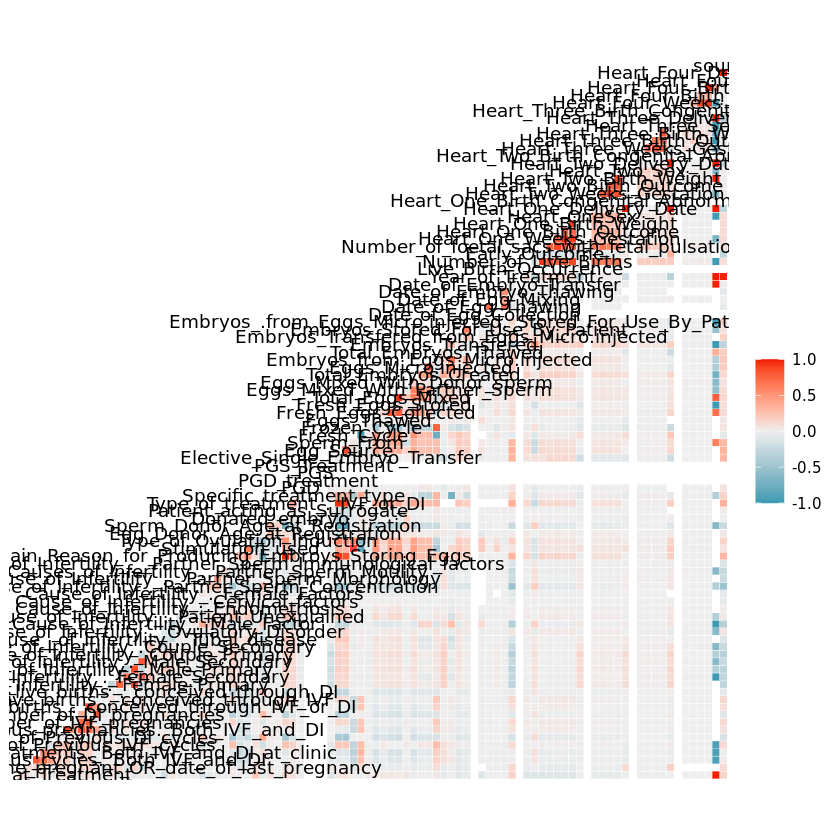

In [151]:
ivf_raw %>% sample_frac(0.1) %>%
    mutate_if(is.character, as.factor) %>%
    mutate_if(is.factor, as.integer) %>%
    GGally::ggcorr()          

In [166]:
corr_df = ivf_raw %>% sample_frac(0.1) %>%
    mutate_if(is.character, as.factor) %>%
    mutate_if(is.factor, as.integer) %>%
    mutate_all(function(x) replace_na(x, 0)) %>%
    corrr::correlate() %>%
    rename(variable=rowname) %>%
    gather(key="assoc_variable", value="value", -variable)

Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'



In [169]:
corr_df %>% filter(variable == "Live Birth Occurrence") %>% arrange(desc(abs(value))) %>% head(50)

variable,assoc_variable,value
Live Birth Occurrence,Heart One Delivery Date,0.98185192
Live Birth Occurrence,Heart One Weeks Gestation,0.95504347
Live Birth Occurrence,Heart One Birth Weight,0.94254280
Live Birth Occurrence,Number of Live Births,0.93228113
Live Birth Occurrence,Heart OneSex,0.92921378
Live Birth Occurrence,Number of foetal sacs with fetal pulsation,0.84421178
Live Birth Occurrence,Heart One Birth Outcome,0.80039575
Live Birth Occurrence,Heart Two Delivery Date,0.41596270
Live Birth Occurrence,Heart Two Sex,0.39461653
Live Birth Occurrence,Heart Two Birth Outcome,0.38945896


In [170]:
corr_df %>% filter(variable == "Type of treatment - IVF or DI") %>% arrange(desc(abs(value))) %>% head(50)

variable,assoc_variable,value
Type of treatment - IVF or DI,Egg Source,0.9676977
Type of treatment - IVF or DI,Main Reason for Producing Embroys Storing Eggs,0.9673752
Type of treatment - IVF or DI,Sperm From,0.8675883
Type of treatment - IVF or DI,Sperm Donor Age at Registration,-0.7621757
Type of treatment - IVF or DI,Fresh Cycle,0.6480706
Type of treatment - IVF or DI,Embryos Transfered,0.5910264
Type of treatment - IVF or DI,Type of Ovulation Induction,0.5266850
Type of treatment - IVF or DI,Cause of Infertility - Partner Sperm Concentration,-0.4982323
Type of treatment - IVF or DI,Total Number of Previous DI cycles,-0.4219186
Type of treatment - IVF or DI,Total Embryos Created,0.4072028


# raw cleaning and eda

In [17]:
ivf_raw_sample = ivf_raw %>% sample_frac(0.1)

In [42]:
ivf_raw_sample %>% count(`Patient Age at Treatment`)

Patient Age at Treatment,n
18 - 34,66183
35-37,30587
38-39,17967
40-42,15388
43-44,4102
45-50,2281
999,1137


In [96]:
format_treatment = function(x) {
    # Marina's solution
    x %>% str_replace_all(" / ", ":") %>%
    str_replace_all("\\+", ":") %>%
    str_replace_all(":Unknown", "") %>%
    str_replace_all(" ", "") %>%
    if_else(is.na(.), "Unknown", .)
}

In [88]:
df = ivf_raw_sample %>%
    select(
        source,
        ivf_or_di=`Type of treatment - IVF or DI`,
        `Specific treatment type`
    ) %>%
    # specific treatment type
    mutate(
        specific_treatment_type=`Specific treatment type` %>% (format_treatment)
    ) %>%
    separate(specific_treatment_type, into=c("main_treatment"), sep=":", remove=FALSE)

Warning message:
“Expected 1 pieces. Additional pieces discarded in 2220 rows [8, 92, 123, 141, 144, 182, 183, 285, 333, 369, 446, 448, 464, 519, 628, 634, 687, 710, 799, 819, ...].”

# A tibble: 45 x 5
   main_treatment          n     pct source                          ivf_or_di
   <chr>               <int>   <dbl> <chr>                           <chr>    
 1 "GenericDI"          8238 99.9    data/raw_data/ar-1991-1994-xlsb DI       
 2 "GIFT"                  8  0.0970 data/raw_data/ar-1991-1994-xlsb DI       
 3 "IVF"                6865 97.2    data/raw_data/ar-1991-1994-xlsb IVF      
 4 "MICROMANIPULATION"   192  2.72   data/raw_data/ar-1991-1994-xlsb IVF      
 5 ""                      5  0.0708 data/raw_data/ar-1991-1994-xlsb IVF      
 6 "GenericDI"          5963 88.7    data/raw_data/ar-1995-1999-xlsb DI       
 7 "IUI"                 520  7.74   data/raw_data/ar-1995-1999-xlsb DI       
 8 "ICI"                 198  2.95   data/raw_data/ar-1995-1999-xlsb DI       
 9 "IVI"                  28  0.417  data/raw_data/ar-1995-1999-xlsb DI       
10 "GIFT"                 10  0.149  data/raw_data/ar-1995-1999-xlsb DI       
11 "IVF"               12215 73.5

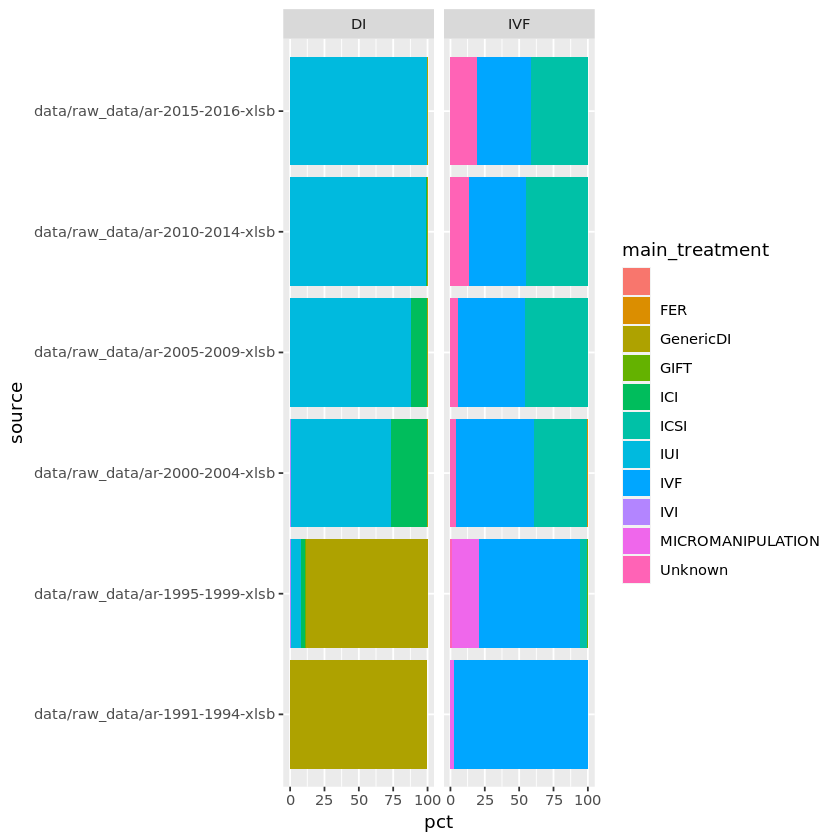

In [90]:
# By each year calc pct of treatment
# then filter to keep treatment over 1%
df %>% select(source, ivf_or_di, main_treatment) %>%
    group_by(source, ivf_or_di) %>% nest() %>%
    mutate(pct=data %>% 
           map(
               function(df) 
                   df %>% count(main_treatment) %>% 
                   mutate(pct=n/sum(.$n)*100)
           )
    ) %>%
    select(-data) %>%
    transpose() %>%
    map_df(function(x) x$pct %>% mutate(source=x$source, ivf_or_di=x$ivf_or_di)) %>%
    filter(., pct > 0.05) %>%
    {
        arrange(., source, ivf_or_di, desc(pct)) %>% print(n=300)
        .
    } %>%
    {
        ggplot(.) +
        aes(x=source, y=pct, fill=main_treatment, group=main_treatment) +
        facet_wrap(~ivf_or_di) +
        geom_col() +
        coord_flip()
    }

In [111]:
ivf_raw %>% count(`Number of foetal sacs with fetal pulsation`)

Number of foetal sacs with fetal pulsation,n
0,1066339
1,246090
2,60636
3,3307
4,68
5,5
6,1
7,1
8,1
10,1


In [110]:
ivf_raw %>% count(`Embryos Transfered`)

Embryos Transfered,n
0,184650
1,244223
2,553683
3,153319
4,28
NA,240551


In [113]:
ivf_raw %>% mutate_at(vars(`Total Embryos Created`), as.integer) %>% 
    count(`Total Embryos Created`)

Warning message:
“NAs introduced by coercion”

Total Embryos Created,n
0,342788
1,64287
2,83648
3,91263
4,90759
5,84089
6,74648
7,62314
8,52442
9,42397


In [115]:
ivf_raw %>% count(source, `Early Outcome`)

source,Early Outcome,n
data/raw_data/ar-1991-1994-xlsb,,12
data/raw_data/ar-1991-1994-xlsb,"Biochemical Pregnancy Only ,Intrauterine Fetal Pulsation Seen",2
data/raw_data/ar-1991-1994-xlsb,Intrauterine Fetal Pulsation Seen,19051
data/raw_data/ar-1991-1994-xlsb,Misscarriage,1
data/raw_data/ar-1991-1994-xlsb,None,133759
data/raw_data/ar-1995-1999-xlsb,,4338
data/raw_data/ar-1995-1999-xlsb,Biochemical Pregnancy Only,1005
data/raw_data/ar-1995-1999-xlsb,"Biochemical Pregnancy Only ,Intrauterine Fetal Pulsation Seen",24
data/raw_data/ar-1995-1999-xlsb,"Biochemical Pregnancy Only ,Misscarriage",4
data/raw_data/ar-1995-1999-xlsb,"Biochemical Pregnancy Only ,Misscarriage ,Intrauterine Fetal Pulsation Seen",1


# step1 cleaning and eda

In [138]:
# Added some from Marina's cleaning too
ivf_step1 = ivf_raw %>%
    mutate(
        cohort=`source` %>% 
             stringr::str_match("data/raw_data/ar-(.+?)-xlsb") %>% `[`(,2),
        patient_age=if_else(
            `Patient Age at Treatment` == "999", 
            NA_character_, 
            `Patient Age at Treatment`)
    ) %>%
    # cause_intertility
    mutate(
        cause_infertility=case_when(
            # combined
            `Cause  of Infertility - Tubal disease` +
            `Cause of Infertility - Ovulatory Disorder` +
            `Cause of Infertility - Male Factor` +
            `Cause of Infertility - Patient Unexplained` +
            `Cause of Infertility - Endometriosis` +
            `Cause of Infertility - Cervical factors` +
            `Cause of Infertility - Female Factors` +
            `Cause of Infertility - Partner Sperm Concentration` +
            `Cause of Infertility -  Partner Sperm Morphology` +
            `Causes of Infertility - Partner Sperm Motility` +
            `Cause of Infertility -  Partner Sperm Immunological factors` >= 2 ~ "Combination known causes",
            # only
            `Cause  of Infertility - Tubal disease` == 1 ~ "Tubal disease",
            `Cause of Infertility - Ovulatory Disorder` == 1 ~ "Ovulatory Disorder",
            `Cause of Infertility - Male Factor` == 1 ~ "Male Factor",
            `Cause of Infertility - Endometriosis` == 1 ~ "Endometriosis",
            `Cause of Infertility - Cervical factors` == 1 ~ "Cervical factors",
            `Cause of Infertility - Female Factors` == 1 ~ "Female Factors",
            `Cause of Infertility - Partner Sperm Concentration` == 1 ~ "Partner Sperm Concentration",
            `Cause of Infertility -  Partner Sperm Morphology` == 1 ~ "Partner Sperm Morphology",
            `Causes of Infertility - Partner Sperm Motility` == 1 ~ "Partner Sperm Motility",
            `Cause of Infertility -  Partner Sperm Immunological factors` == 1 ~ "Partner Sperm Immunological factors",
            `Cause of Infertility - Patient Unexplained` == 1 ~ "Unknown",
            # else
            TRUE ~ "Unknown",
        )
    ) %>%
    # type intertility
    mutate(
        type_infertility=case_when(
            # combined
            `Type of Infertility - Female Primary` +
            `Type of Infertility - Female Secondary` +
            `Type of Infertility - Male Primary` +
            `Type of Infertility - Male Secondary` +
            `Type of Infertility -Couple Primary` +
            `Type of Infertility -Couple Secondary` >= 2 ~ "Combined",
            # one of
            `Type of Infertility - Female Primary` == 1 ~ "Female Primary",
            `Type of Infertility - Female Secondary` == 1 ~ "Female Secondary",
            `Type of Infertility - Male Primary` == 1 ~ "Male Primary",
            `Type of Infertility - Male Secondary` == 1 ~ "Male Secondary",
            `Type of Infertility -Couple Primary` == 1 ~ "Couple Primary",
            `Type of Infertility -Couple Secondary` == 1 ~ "Couple Secondary",
            # else
            TRUE ~ "Unknown",
        )
    ) %>%
    # main_reason_enrolment
    rename(main_reason_enrolment=`Main Reason for Producing Embroys Storing Eggs`) %>%
    mutate_at(
        vars(main_reason_enrolment),
        # Append "," to every item, match up to first ",", then clean up
        # Move NA to "Unknown"
        function(x) 
            if_else(x == "", NA_character_, paste0(x, ",")) %>%
            str_match("(.+?),") %>%
            `[`(, 2) %>%
            str_trim() %>%
            str_replace_all(",", "") %>%
            if_else(condition=is.na(.), 
                    true="Unknown", 
                    false=as.character(.))
    ) %>%
    # specific treatment
    mutate(
        specific_treatment=`Specific treatment type` %>% format_treatment() %>%
        str_split(":"),
        # super ivf treatment
        treatment_ivf_ivf=specific_treatment %>% 
            map_lgl(function(x) "IVF" %in% x),
        treatment_ivf_icsi=specific_treatment %>% 
            map_lgl(function(x) "ICSI" %in% x),
        treatment_ivf_unknown=specific_treatment %>% 
            map_lgl(function(x) "Unknown" %in% x),
        # super di treatment
        treatment_di_ici=specific_treatment %>%
            map_lgl(function(x) "ICI" %in% x),
        treatment_di_iui=specific_treatment %>%
            map_lgl(function(x) "IUI" %in% x)
    ) %>%
    mutate(
        early_outcome=`Early Outcome` %>% str_split(" ,"),
        early_outcome_ectopic=early_outcome %>%
            map_lgl(function(x) "Ectopic" %in% x),
        early_outcome_hetrotopic=early_outcome %>%
            map_lgl(function(x) "Hetrotopic" %in% x),
        early_outcome_molar=early_outcome %>%
            map_lgl(function(x) "Molar" %in% x),
        early_outcome_intrauterine=early_outcome %>%
            map_lgl(function(x) "Intrauterine Fetal Pulsation Seen" %in% x),
        early_outcome_biochemical=early_outcome %>%
            map_lgl(function(x) "Biochemical Pregnancy Only" %in% x),
        early_outcome_misscarriage=early_outcome %>%
            map_lgl(function(x) "Misscarriage" %in% x)
    )

# step1 EDA

### general

In [136]:
ivf_step1 %>% count(main_reason_enrolment)

main_reason_enrolment,n
For Donation,15940
For Research,5
For Storing Eggs,5321
For Storing Embryos,14509
Reason unassigned,125
Treatment Now,1100003
Unknown,240551


## `cohort`

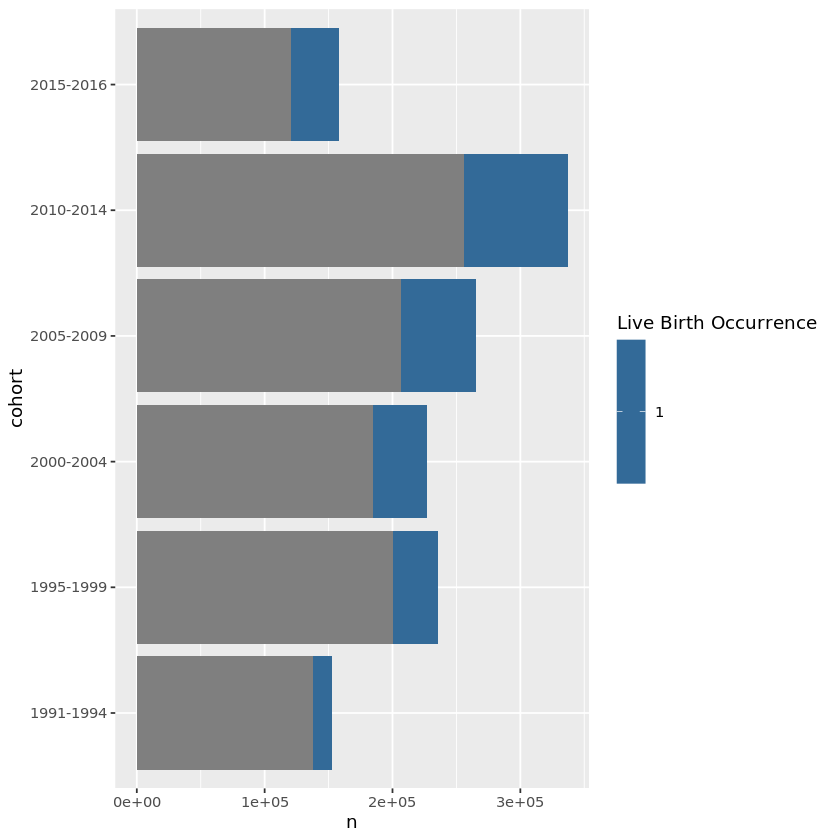

In [6]:
ivf_step1 %>%
    count(cohort, `Live Birth Occurrence`) %>% arrange(desc(n)) %>%
    {
        ggplot(.) +
        aes(x=cohort, y=n, 
            group=`Live Birth Occurrence`,
            fill=`Live Birth Occurrence`) +
        geom_col() + 
        coord_flip()
    }

## `Live Birth Occurrence`

# A tibble: 6 x 2
  cohort    `Live Birth Occurrence`
  <chr>                       <dbl>
1 1991-1994                  0.0999
2 1995-1999                  0.151 
3 2000-2004                  0.188 
4 2005-2009                  0.221 
5 2010-2014                  0.241 
6 2015-2016                  0.240 


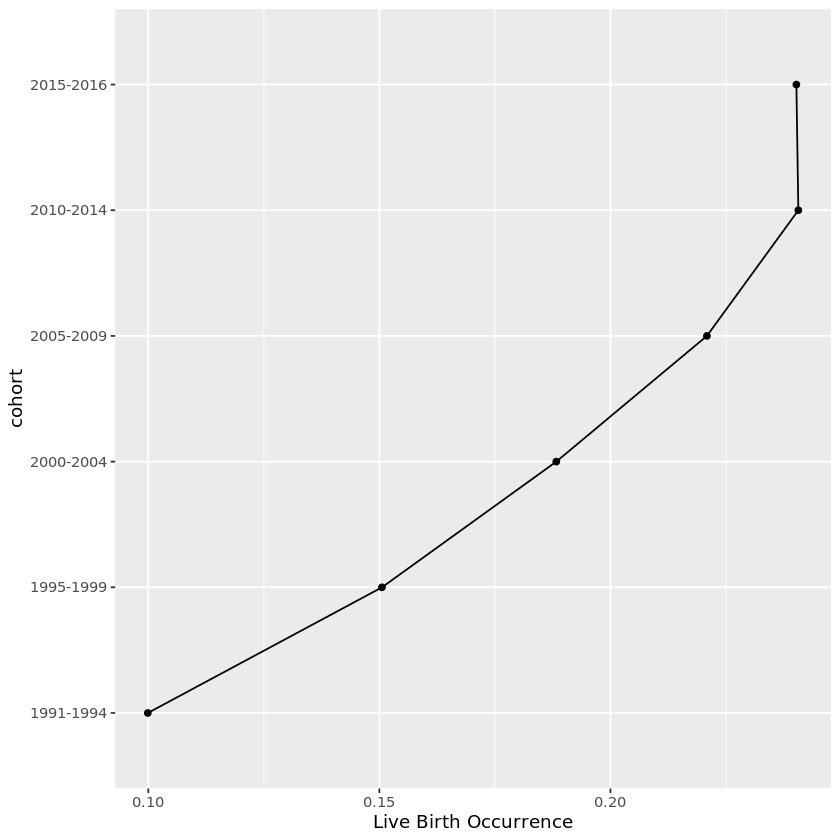

In [7]:
ivf_step1 %>% 
    mutate_at(vars(`Live Birth Occurrence`), 
              function(x) if_else(is.na(x), 0L, as.integer(x))) %>%
    group_by(cohort) %>%
    summarise_at(vars(`Live Birth Occurrence`), mean) %>%
    {print(.); .} %>%
    {
        ggplot(.) + 
        aes(x=cohort, 
            y=`Live Birth Occurrence`, group=1) + 
        geom_point() +
        geom_line() +
        coord_flip()
    }

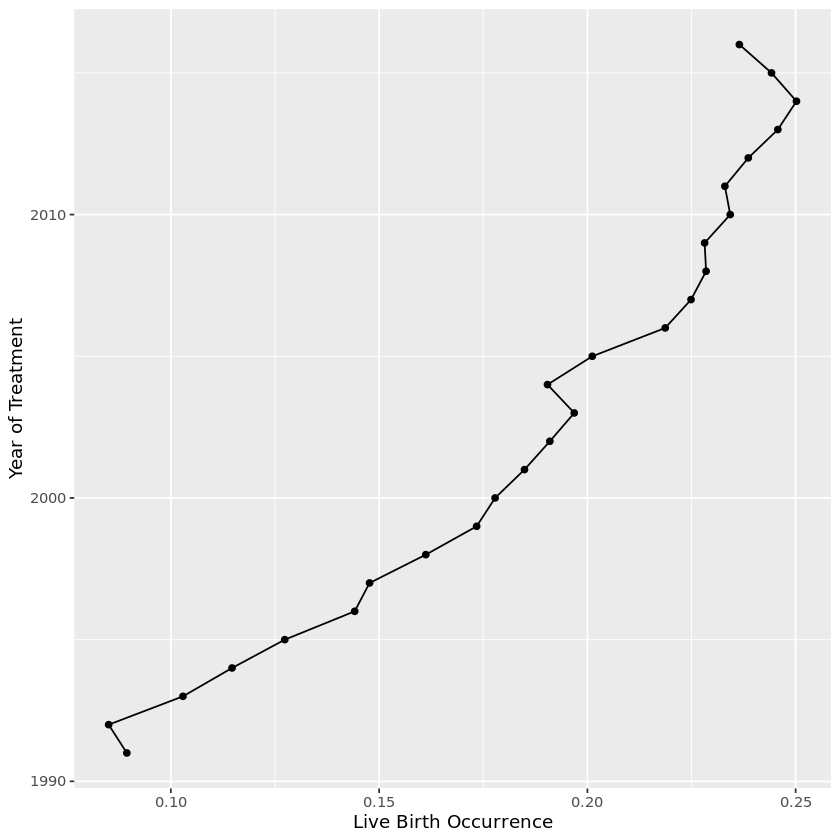

In [8]:
ivf_step1 %>% 
    mutate_at(vars(`Live Birth Occurrence`), function(x) if_else(is.na(x), 0L, as.integer(x))) %>%
    group_by(`Year of Treatment`) %>%
    summarise_at(vars(`Live Birth Occurrence`), mean) %>%
    {
        ggplot(.) + 
        aes(x=`Year of Treatment`, 
            y=`Live Birth Occurrence`, group=1) + 
        geom_point() +
        geom_line() +
        coord_flip()
    }

In [9]:
ivf_step1 %>% count(`Number of Live Births`)

Number of Live Births,n
0,1105156
1,218812
2,50385
3,2077
4,24


# A tibble: 6 x 2
  cohort    `Number of Live Births`
  <chr>                       <dbl>
1 1991-1994                   0.124
2 1995-1999                   0.190
3 2000-2004                   0.233
4 2005-2009                   0.271
5 2010-2014                   0.281
6 2015-2016                   0.269


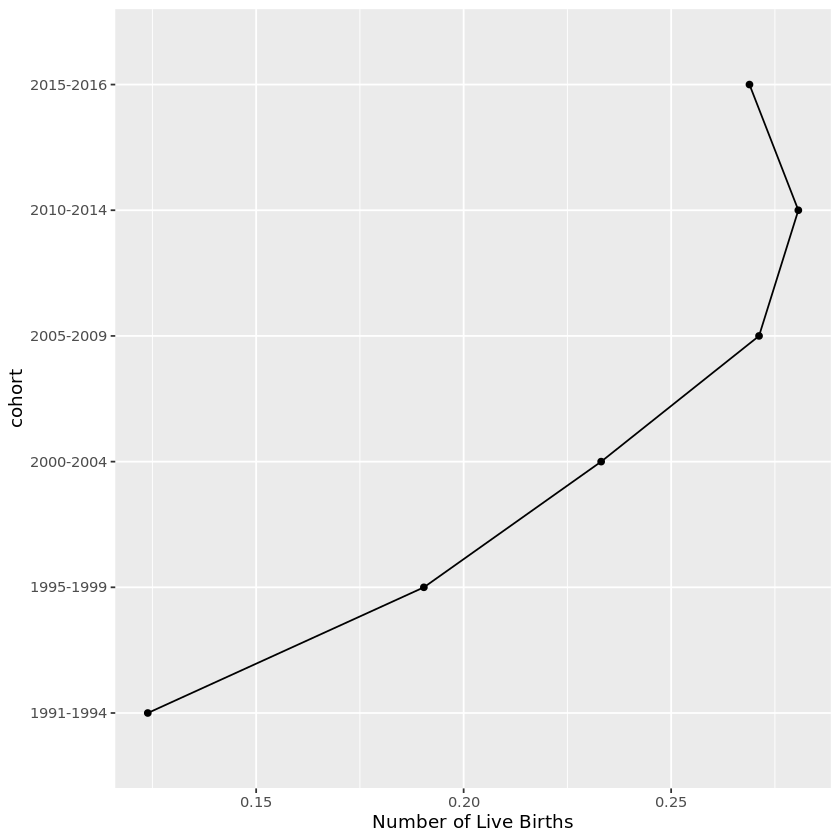

In [10]:
ivf_step1 %>% 
    group_by(cohort) %>%
    summarise_at(vars(`Number of Live Births`), mean) %>%
    {print(.); .} %>%
    {
        ggplot(.) + 
        aes(x=cohort, 
            y=`Number of Live Births`, group=1) + 
        geom_point() +
        geom_line() +
        coord_flip()
    }

## `Patient Age at Treatment`

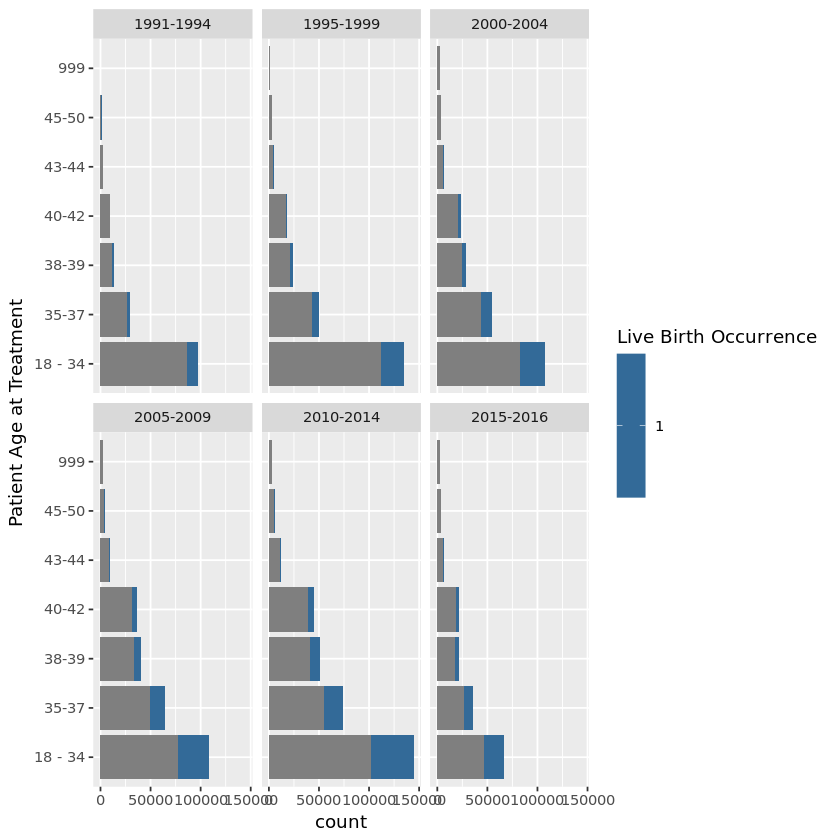

In [11]:
ivf_step1 %>% select(cohort, patient_age, `Live Birth Occurrence`) %>%
{
    ggplot(.) +
    aes(x=patient_age,
        fill=`Live Birth Occurrence`,
        group=`Live Birth Occurrence`) +
    facet_wrap(~cohort) +
    geom_bar() +
    coord_flip()
}

## `cause_infertility`

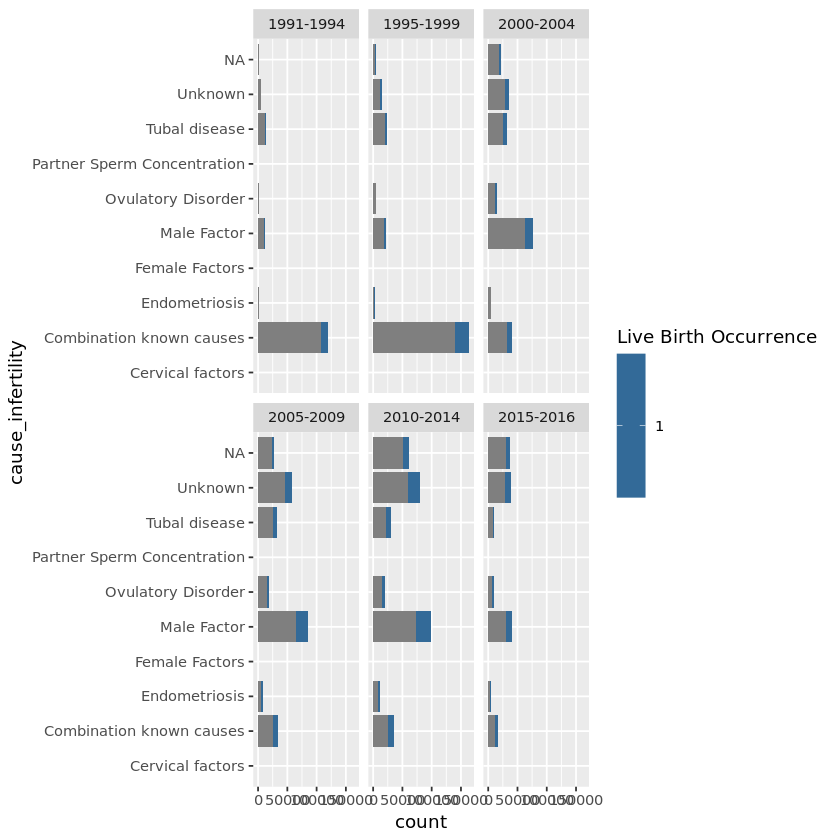

In [12]:
ivf_step1 %>% select(cause_infertility, cohort, `Live Birth Occurrence`) %>% 
{
    ggplot(.) + 
    aes(x=cause_infertility, 
        group=`Live Birth Occurrence`,
        fill=`Live Birth Occurrence`) + 
    facet_wrap(~cohort) +
    geom_bar() +
    coord_flip()
}

## `Sperm from`

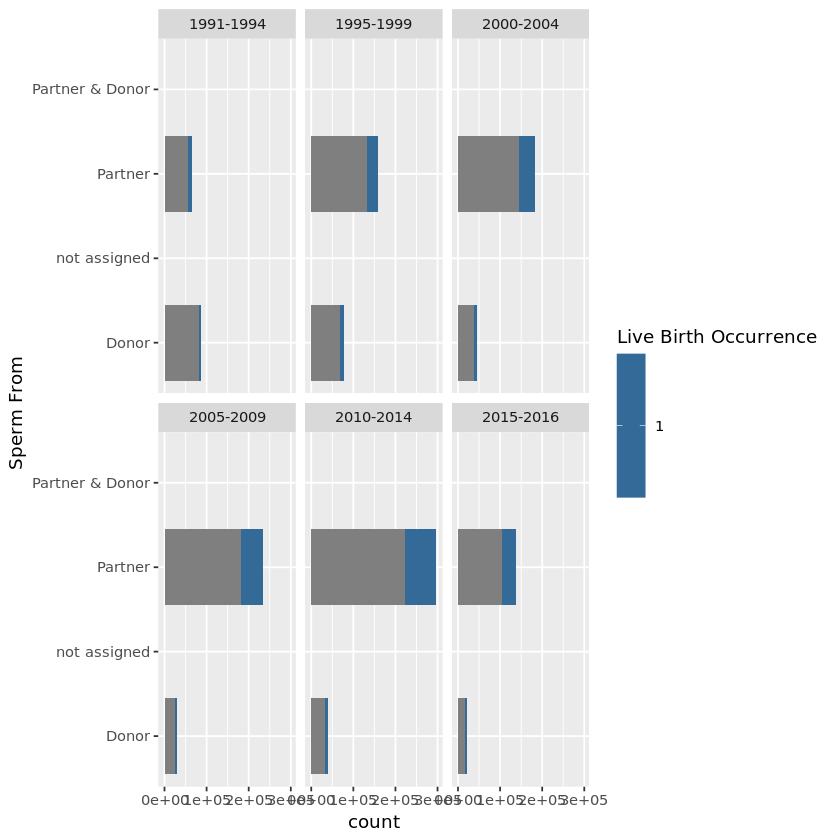

In [13]:
ivf_step1 %>% select(cohort, `Sperm From`, `Live Birth Occurrence`) %>% 
{
    ggplot(.) + 
    aes(x=`Sperm From`, 
        group=`Live Birth Occurrence`,
        fill=`Live Birth Occurrence`) + 
    facet_wrap(~cohort) +
    geom_bar() +
    coord_flip()
}

# step2 cleaning

In [139]:
ivf_step2 = ivf_step1 %>%
    select(
        # meta vars
        cohort,
        year=`Year of Treatment`,
        # outcome vars
        live_birth_occurr=`Live Birth Occurrence`,
        num_live_births=`Number of Live Births`,
        # explanatory vars
        patient_age,
        duration_infertility=`Date patient started trying to become pregnant OR date of last pregnancy`,
        cause_infertility,
        type_infertility,
        main_reason_enrolment,
        main_treatment=`Type of treatment - IVF or DI`,
        treatment_ivf_ivf,
        treatment_ivf_icsi,
        treatment_ivf_unknown,
        treatment_di_ici,
        treatment_di_iui,
        early_outcome_ectopic,
        early_outcome_hetrotopic,
        early_outcome_molar,
        early_outcome_intrauterine,
        early_outcome_biochemical,
        early_outcome_misscarriage
    ) %>%
    mutate_at(vars(live_birth_occurr),
             function(x) if_else(is.na(x), 0L, as.integer(x))) %>%
    mutate_at(
        vars(
            treatment_ivf_ivf,
            treatment_ivf_icsi,
            treatment_ivf_unknown,
            treatment_di_ici,
            treatment_di_iui,
            early_outcome_ectopic,
            early_outcome_hetrotopic,
            early_outcome_molar,
            early_outcome_intrauterine,
            early_outcome_biochemical,
            early_outcome_misscarriage
        ),
        as.integer
    )
ivf_step2 %>% glimpse()

Observations: 1,376,454
Variables: 21
$ cohort                     <chr> "2010-2014", "2010-2014", "2010-2014", "20…
$ year                       <int> 2010, 2013, 2012, 2014, 2010, 2011, 2013, …
$ live_birth_occurr          <int> 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, …
$ num_live_births            <int> 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, …
$ patient_age                <chr> "18 - 34", "35-37", "18 - 34", "38-39", "3…
$ duration_infertility       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ cause_infertility          <chr> "Unknown", "Unknown", "Ovulatory Disorder"…
$ type_infertility           <chr> "Unknown", "Unknown", "Unknown", "Unknown"…
$ main_reason_enrolment      <chr> "Unknown", "Unknown", "Unknown", "Unknown"…
$ main_treatment             <chr> "DI", "DI", "DI", "DI", "DI", "DI", "DI", …
$ treatment_ivf_ivf          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ treatment_ivf_icsi         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ treatment_iv

In [140]:
ivf_step2 %>% skimr::skim()

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             1376454   
Number of columns          21        
_______________________              
Column type frequency:               
  character                6         
  numeric                  15        
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable         n_missing complete_rate   min   max empty n_unique
1 cohort                        0         1         9     9     0        6
2 patient_age               11676         0.992     5     7     0        6
3 cause_infertility             0         1         7    27     0        9
4 type_infertility              0         1         7    16     0        8
5 main_reason_enrolment         0         1         7    19     0        7
6 main_treatment                0         1    

Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”

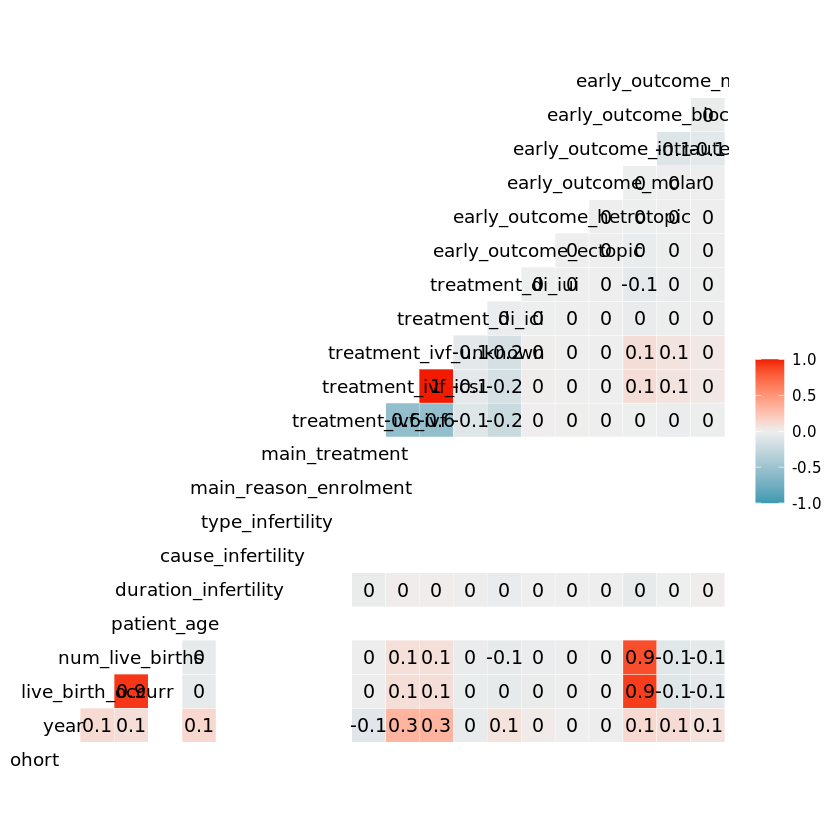

In [148]:
ivf_step2 %>% 
    mutate_if(is.character, as.integer) %>%
    GGally::ggcorr(label=TRUE)

In [141]:
ivf_step2 %>% write_csv("data/hfea-ivf-cleaned.csv")